# Set up
1) Load the necessary modules for this toturial
2) Load the GridSamp toolbox and set the path correctly

In [1]:
# LOAD MODULES
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import math

In [2]:
# LOAD IAM

# Change directory to that of IAM to load it
os.chdir(r'C:\Users\u0154823\OneDrive - KU Leuven\Desktop\PhD\0 Preparation\0.2 IAM toolbox\IAM toolbox\source-code\image-aesthetic-map-toolbox')

# Open IAM toolbox
from grid_samp import ImageRegion, ImageRegionList
from grid_samp.grids import FixedGrid, RecursiveGrid, ImageRegionBasedGrid
from grid_samp.assemble import ROI, ImageRegionIntersectionHeatmap, Mosaic, Contextualize

# Set environment to current environment
os.chdir("Tutorials")

# Meaning maps
This tutorial demonstrates how to divide an image into grid-based regions (fine and coarse), apply circular masks, and extract the regions for further use (e.g., for building meaning maps). The turoial first demonstrates how to make the stimuli. Then it shows how to make some common visualisations.

## Making image regions for generating meaning maps
Stepwise summary
1) Divide the image into a grid of regions
2) Apply circular masks to the regions
3) Extract and save the masked regions as images


In [3]:
# Load example image
image = 'scene_example.jpg'
image = Image.open(image)

### Divide the image into a grid of image regions
Explanation:
* A FixedGrid object divides the image into a grid of rectangular regions.
* The fine grid consists of 15 rows x 20 columns. These results in smaller, more detailed regions.
* The coarse grid consists of 9 rows x 12 columns. This results in larger, broader regions.
* Each grid returns a list of image_regions, typically containing bounding box information and region-specific methods.

In [4]:
# ---- Grid for fine regions
fine_grid = FixedGrid(image = image, n_rows = 15, n_cols = 20)
fine_regions = fine_grid.image_regions

# ---- Grid for coarse regions
coarse_grid = FixedGrid(image = image, n_rows = 9, n_cols = 12)
coarse_regions = coarse_grid.image_regions

### Apply circular masks to image regions and extract image regions as images
Explanation:
* Iterates over each region in the `fine_regions` list. To replicate when using the `coarse_region` list, simply replace the `fine_region` list with the `coarse_region` list.
* `set_mask(mask_type=1)` applies a circular mask to the region.
* `extract_from_image(image)` crops and masks the region from the original image. Extracting the image region from the image returns a `PIL.Image` object.
* The circular region is saved as a .png file with a filename indicating its index.
* The break is used here to only process the first region for demonstration — remove it to process all.

INFO: Regenerating mask to match clipped region of size (450, 450)


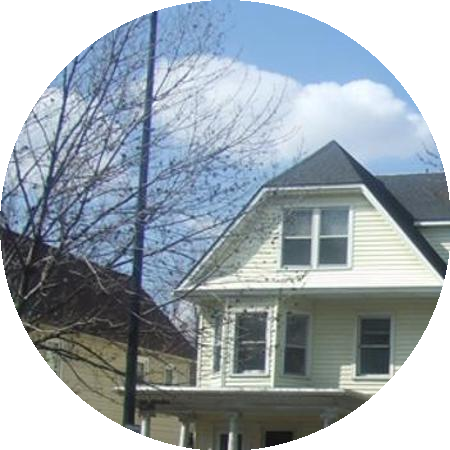

In [15]:
# Loop through all regions.
for region_index, region in enumerate(fine_regions):
    region = fine_regions.get(region_index)  # Get each region from the list of image regions

    # Step 2: introduce the overlap between the regions
    region = region.set_region_dimensions_to_pixels(850).set_mask(mask_type=1)

    break  # Remove the break if you want to extract all regions.

region.extract_from_image(image)

In [41]:
# Loop through all regions
for region_index, region in enumerate(fine_regions):
    # Get the region by index
    region = fine_regions.get(region_index)

    # Step 1: Set region size and apply mask with overlap
    region = region.set_region_dimensions_to_pixels(100).set_mask(mask_type=1)

    # Step 2: Update the region list to track the new sizes
    fine_regions = fine_regions.replace(region_index, region)

    # Step 3: Extract the masked region from the image
    extracted = region.extract_from_image(image)

    # Optional: turn on to save the result.
    extracted.save(f"regions_out/fine_region_{region_index}.png")

INFO: Regenerating mask to match clipped region of size (75, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regenerating mask to match clipped region of size (100, 75)
INFO: Regen

## Visualizing the division procedure
This step helps visualize how the image is divided into fine and coarse grids, and how circular regions are extracted from the grid cells.

### Imports
Explanation:
* `matplotlib.pyplot`: Provides the core plotting interface. Used to create figures, display images, and add annotations (e.g., titles, axes, layouts).
* `matplotlib.patches`: Contains tools to draw geometric shapes like circles, rectangles, etc. In this tutorial, we use `patches.Circle` to plot circular overlays on the image.

**Note:** While `GridSamp` has internal visualization capabilities, they are based on bounding boxes and do not reflect circular region shapes accurately. For visualizing circular masks, it’s better to use `matplotlib` for full flexibility and clarity.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Visualize Grid Centers
Explanation:
* Displays the original image with overlaid circles at the center of each region.

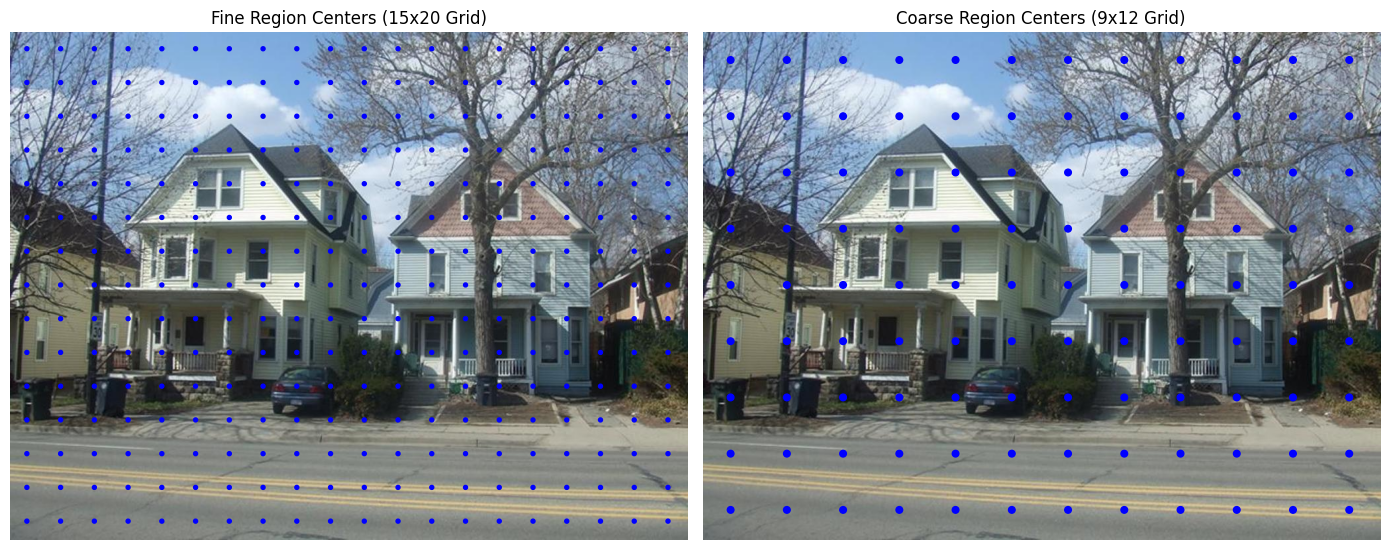

In [30]:
# Get region centers and bounding boxes
fine_centers = [region.get_center() for region in fine_regions]
coarse_centers = [region.get_center() for region in coarse_regions]

# Plot image with overlaid region centers
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# ---- Fine Grid
axs[0].imshow(image)
for center in fine_centers:
    circle = patches.Circle(center, radius=3, color='blue', fill=True)
    axs[0].add_patch(circle)
axs[0].set_title('Fine Region Centers (15x20 Grid)')
axs[0].axis('off')

# ---- Coarse Grid
axs[1].imshow(image)
for center in coarse_centers:
    circle = patches.Circle(center, radius=5, color='blue', fill=True)
    axs[1].add_patch(circle)
axs[1].set_title('Coarse Region Centers (9x12 Grid)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


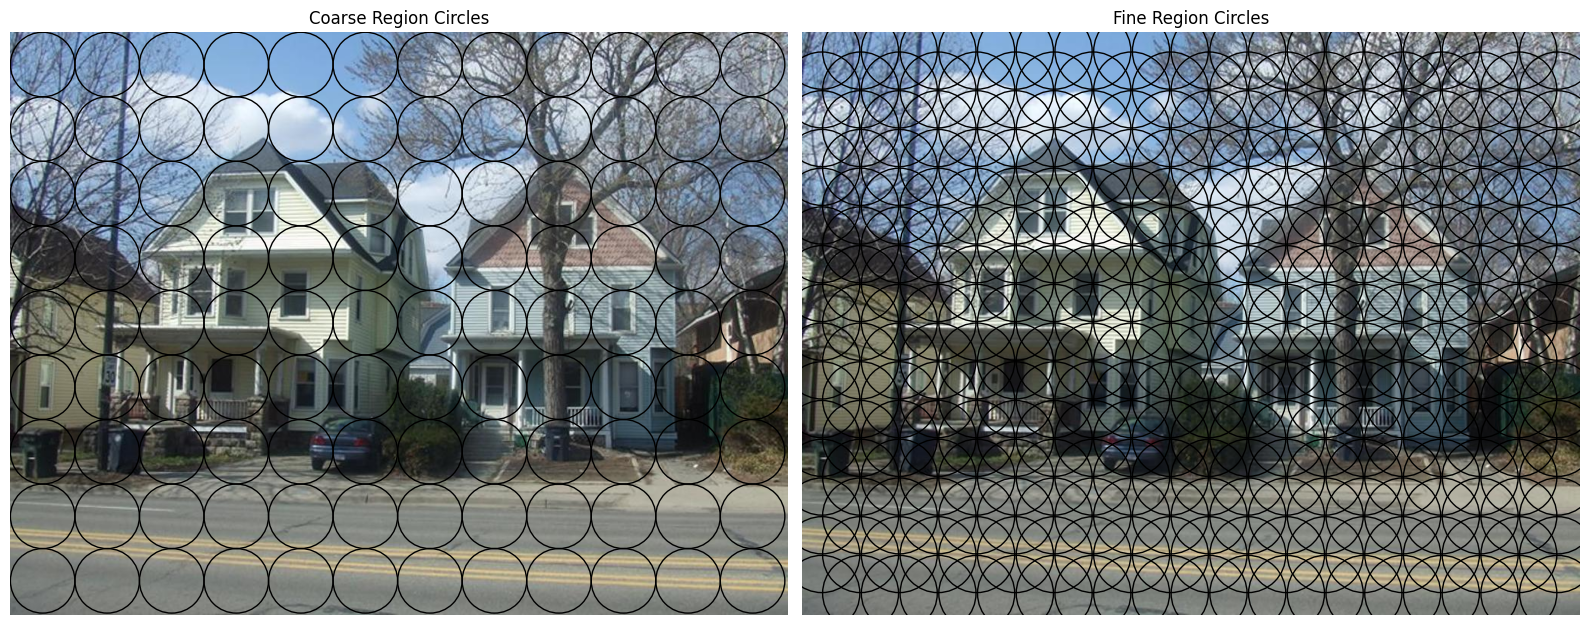

In [42]:
# Get the bounding boxes
fine_boxes = [region.get_bounding_box() for region in fine_regions]
coarse_boxes = [region.get_bounding_box() for region in coarse_regions]

# Function to compute center and radius from bounding box
def center_and_radius_from_bbox(bbox):
    x_min, y_min, x_max, y_max = bbox
    width = x_max - x_min
    height = y_max - y_min
    radius = min(width, height) / 2
    center_x = x_min + width / 2
    center_y = y_min + height / 2
    return (center_x, center_y, radius)

# Create figure with 2 panels
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Panel 1: Coarse regions
axes[0].imshow(image)
axes[0].set_title("Coarse Region Circles")
axes[0].axis('off')

for bbox in coarse_boxes:
    cx, cy, r = center_and_radius_from_bbox(bbox)
    circle = patches.Circle((cx, cy), radius=r, color='black', fill=False, linewidth=1)
    axes[0].add_patch(circle)

# Panel 2: Fine regions
axes[1].imshow(image)
axes[1].set_title("Fine Region Circles")
axes[1].axis('off')

for bbox in fine_boxes:
    cx, cy, r = center_and_radius_from_bbox(bbox)
    circle = patches.Circle((cx, cy), radius=r, color='black', fill=False, linewidth=1)
    axes[1].add_patch(circle)

plt.tight_layout()
plt.show()

### Visualize Circular Regions

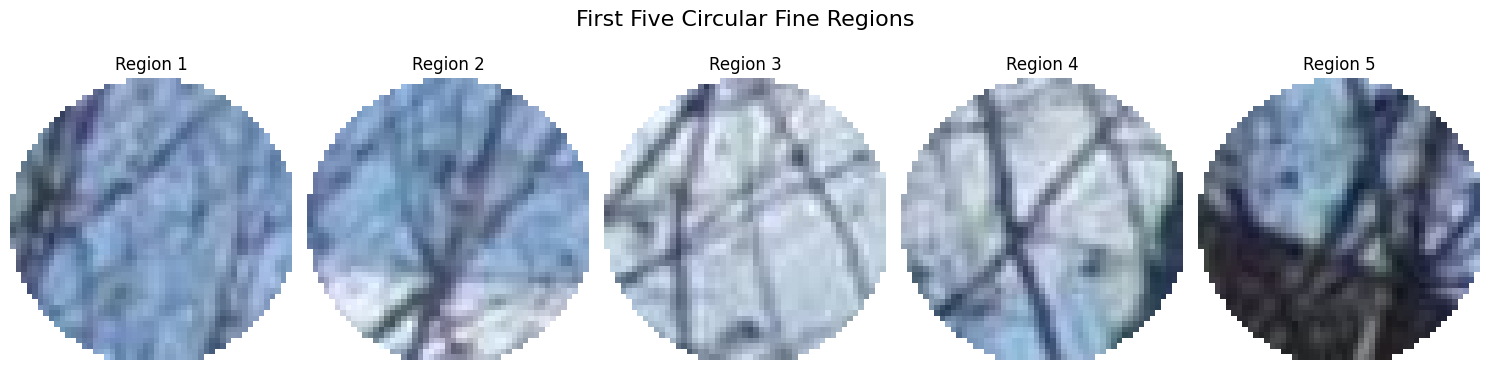

In [9]:
# Process and collect first 5 circular fine regions for visualization
processed_regions = []
for _, region in enumerate(fine_regions):
    region.set_mask(mask_type=1)  # Apply circular mask
    extracted = region.extract_from_image(image)
    processed_regions.append(extracted)

# Plot the circular regions
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, (ax, region_img) in enumerate(zip(axes, processed_regions)):
    ax.imshow(region_img, cmap='gray')
    ax.set_title(f'Region {i+1}')
    ax.axis('off')

plt.suptitle("First Five Circular Fine Regions", fontsize=16)
plt.tight_layout()
plt.show()


# Checkerboards

In [9]:
# Load example image
image = 'example img.jpg'
image = Image.open(image)

##  Set Up Recursive Grid
Explanation:
* A recursive grid divides the image into increasingly smaller sub-regions.
* At recursion = 4, you get $2^4 \times 2^4 = 256$ region
* These regions can be manipulated individually — for example, by altering their transparency

In [46]:
recursion = 4  # Set recursion depth

# Create the full image region
image_region = ImageRegion.from_image(image)

# Generate the recursive grid
recursive_grid = RecursiveGrid(image_region, recursion_depth=recursion)

# Retrieve regions at the final recursion level
level_2_regions = recursive_grid.get_recursion_level_images(recursion_level=recursion)

# Initialize grid
level_2_regions = ImageRegionList(level_2_regions)

# Calculate total number of regions
total_regions = (2 * 2) ** recursion
row_length = int(math.sqrt(total_regions) - 1)

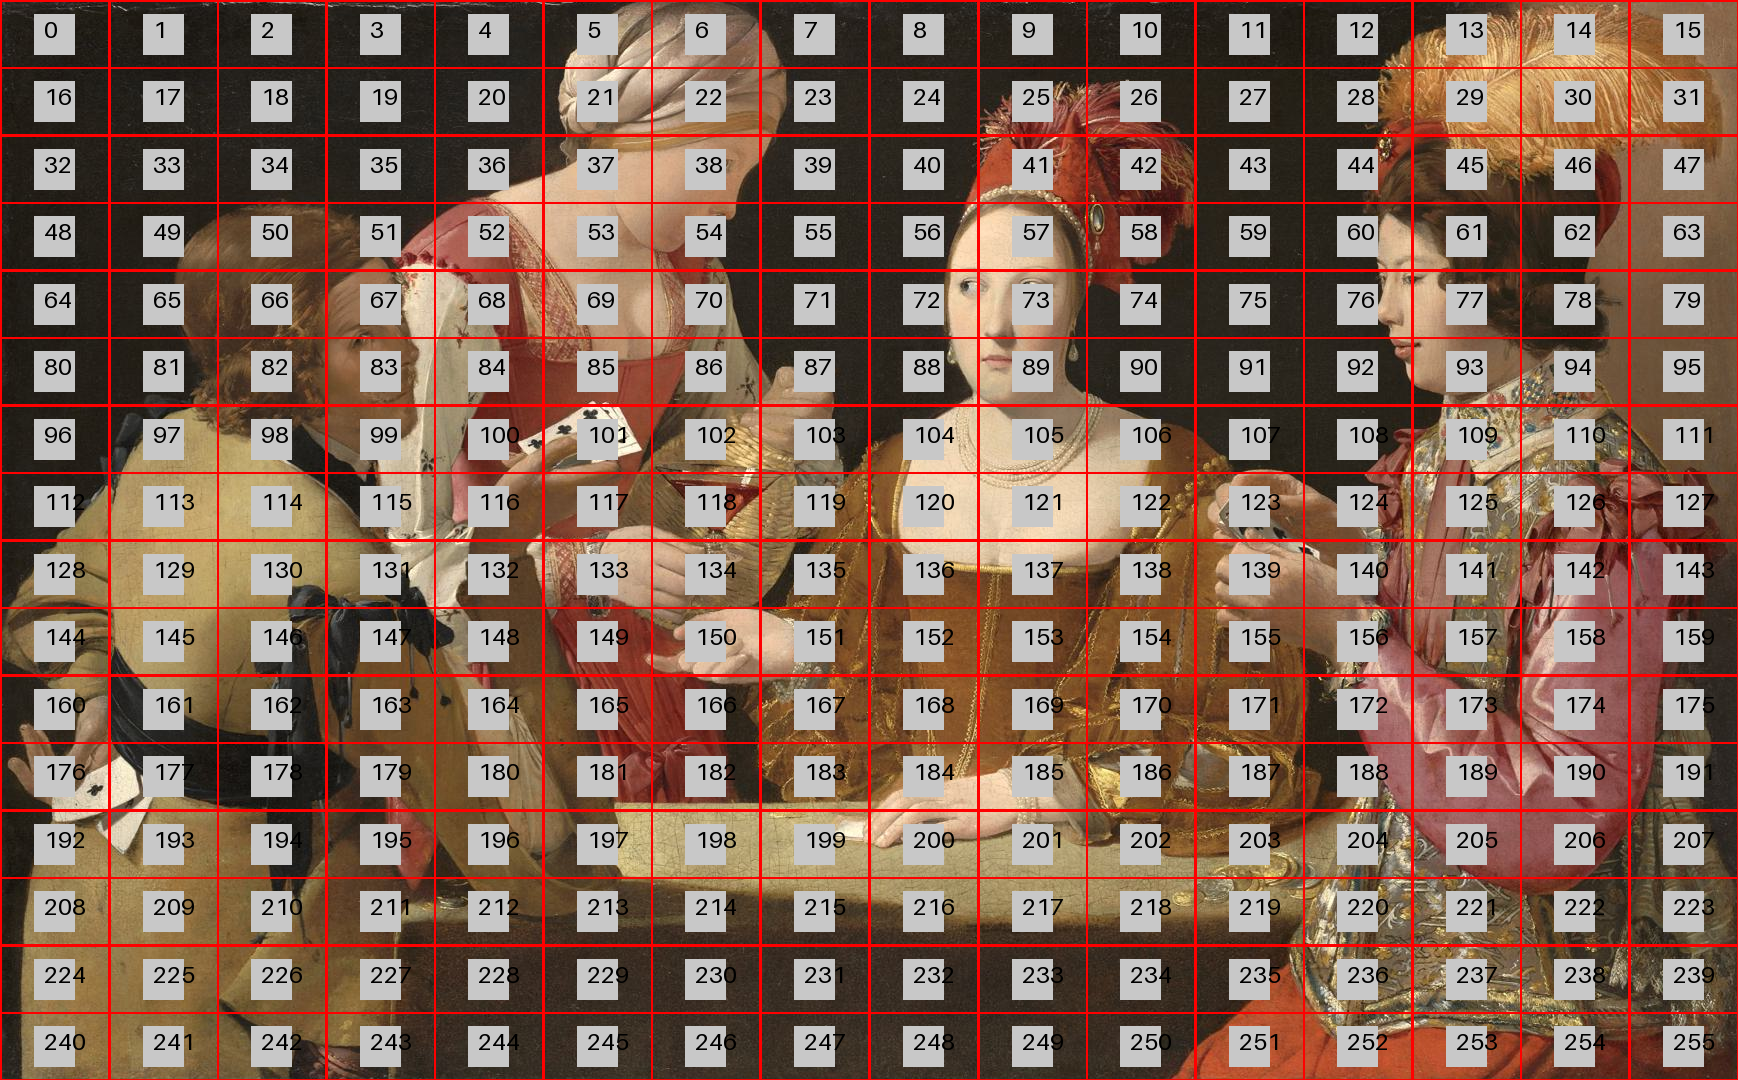

In [43]:
ROI.generate(image, level_2_regions, draw_index=True)

## Define Transparency Pattern (Even Start)
Explanation:
* Iterates over blocks of 4 regions at a time.
* Alternates transparency pattern every two blocks (e.g., blocks 0–1, 2–3, etc.).
* Either odd or even regions are made transparent depending on the block position.
* Creates a visually alternating "on-off" mosaic layout starting with even blocks visible.


In [ ]:
# Calculate total regions and row length
total_regions = (2 * 2) ** recursion
row_length = int(math.sqrt(total_regions))

# Apply alternating transparency rule per row
for i in range(total_regions):
    row = i // row_length
    use_even_transparent = (row % 2 != 0)

    if (i % 2 == 0 and use_even_transparent) or (i % 2 != 0 and not use_even_transparent):
        region = level_2_regions.get(i)
        region.set_transparency(0)
        level_2_regions = level_2_regions.replace(i, region)

            
even_start = Mosaic.generate(image, level_2_regions, margin=0)
even_start

SyntaxError: invalid syntax (1676871990.py, line 8)

## Define Opposite Pattern (Odd Start)
Explanation:
* Same logic as before, but the transparency alternation starts on a different offset (odd vs. even).
* This generates a second version of the mosaic, showing the effect of starting from a different alignment.

In [25]:
# Reinitialize regions
image_region = ImageRegion.from_image(image)
recursive_grid = RecursiveGrid(image_region, recursion_depth=recursion)
level_2_regions = recursive_grid.get_recursion_level_images(recursion_level=recursion)

for block_start in range(0, total_regions, block_size):
    block_pair_index = (block_start // block_size) // 2
    make_odd_transparent = (block_pair_index % 2 == 1)

    for region_index in range(block_start, min(block_start + block_size, total_regions)):
        if make_odd_transparent:
            should_transparent = (region_index % 2 != 0)
        else:
            should_transparent = (region_index % 2 == 0)

        if should_transparent:
            region = level_2_regions.get(region_index)
            region.set_transparency(0)
            level_2_regions = level_2_regions.replace(region_index, region)

odd_start = Mosaic.generate(image, level_2_regions, margin=0)

## Visualize Both Mosaics
Explanation:
* Displays the two generated mosaics side by side.
* Helps visually compare how the transparency alternation pattern shifts depending on the starting parity

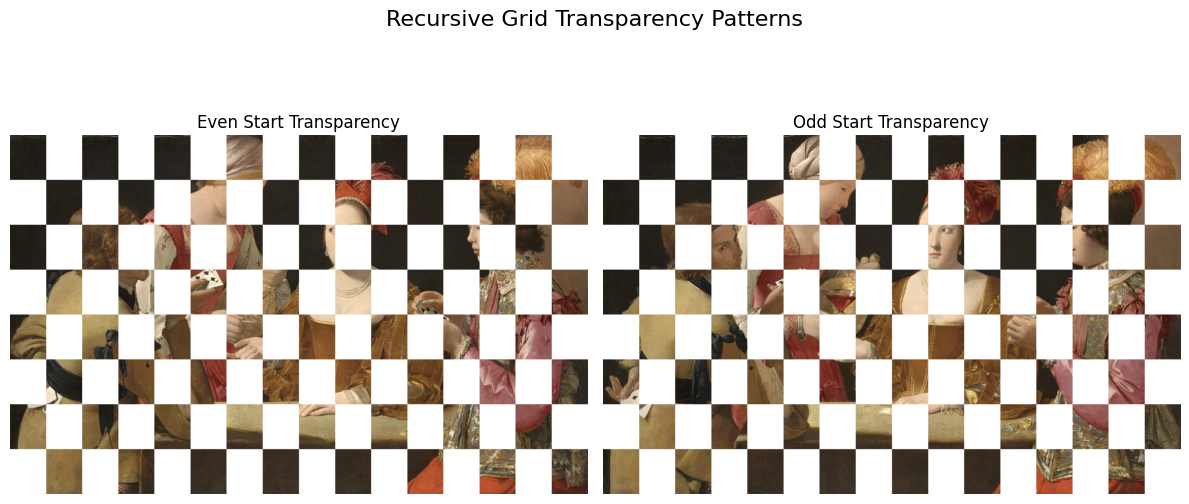

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(even_start)
axs[0].set_title("Even Start Transparency")
axs[0].axis('off')

axs[1].imshow(odd_start)
axs[1].set_title("Odd Start Transparency")
axs[1].axis('off')

plt.suptitle("Recursive Grid Transparency Patterns", fontsize=16)
plt.tight_layout()
plt.show()